## BIKE SHARING LINEAR REGRESSION
        A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.



## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:
## The company wants to know:
* 
Which variables are significant in predicting the demand for shared bik
* H
How well those variables describe the bike demands

## Steps going to follow in the assignment
1.Reading , understanding and visualizing the data<br>
2.Preparing the Data<br>
3.Training the Model<br>
4.Residual Analysis<br>
5.Prediction and Evaluation of the test set

# 1.Reading the Data

In [2332]:

#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2333]:
#Read the csv file using pandas
bikesh_df = pd.read_csv('day.csv')
bikesh_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 1.1 Data Quality

In [2335]:
bikesh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2336]:
bikesh_df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<ul><li>No Null Values in the dataset</li></ul>

In [2338]:
bikesh_df.shape

(730, 16)

<h3>Findings Based on Shape </h3>
<ul><li>Totally 730 rows with 16 columns<br></li><li>Most of the columns are integer ,few are float and one is Object</li></ul>


In [2340]:
bikesh_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2341]:
#check the columns of data
bikesh_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [2342]:
#check the size of data
bikesh_df.size

11680

## Step3: Cleaning Data
<h3>Drop columns that are not useful for analysis</h3>
<ul>
<li><b>instance</b> is just an incremental column as Row Number</li>
<li><b>dteday</b> can removed as we have the same values in the form of <b>yr,mnth</b></li>
<li><b>casual,registered </b> can be removed as we have the combination of that column as <b>cnt</b></li></ul>

In [2344]:
bikeSharing_df=bikesh_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [2345]:
bikeSharing_df.season.value_counts()


season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [2346]:
bikeSharing_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [2347]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [2348]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [2349]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

<h3><b>temp,atemp,hum,windspeed</b> are continuous value with independent variable</h3>
we can plot an outlier 

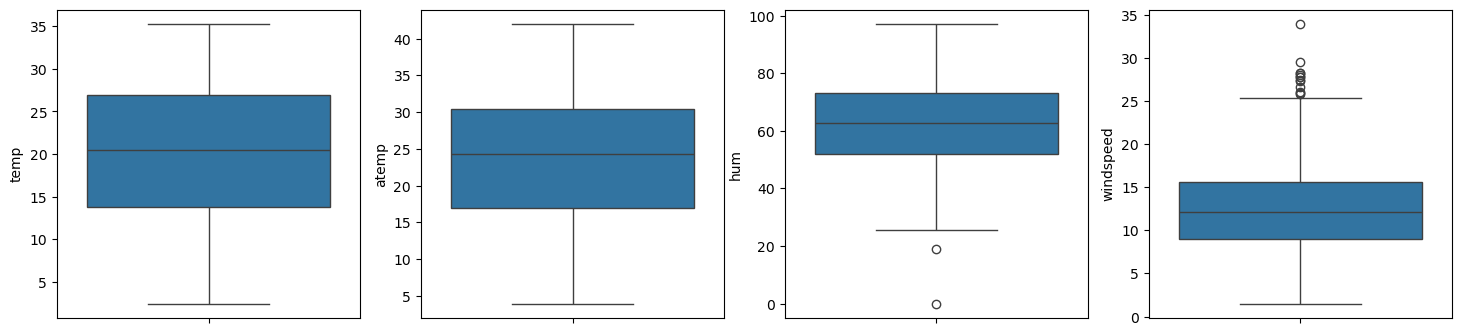

In [2351]:
col_box = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))
i = 1
for col in col_box:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

<h3>Not having any outliers to be handled so good to go </h3>

## 1.2 EDA
Convert into Categorical Datatype


In [2354]:
bikeSharing_df['season']=bikeSharing_df['season'].astype('category')
bikeSharing_df['weathersit']=bikeSharing_df['weathersit'].astype('category')
bikeSharing_df['mnth']=bikeSharing_df['mnth'].astype('category')
bikeSharing_df['weekday']=bikeSharing_df['weekday'].astype('category')
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [2355]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [2356]:
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [2357]:
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

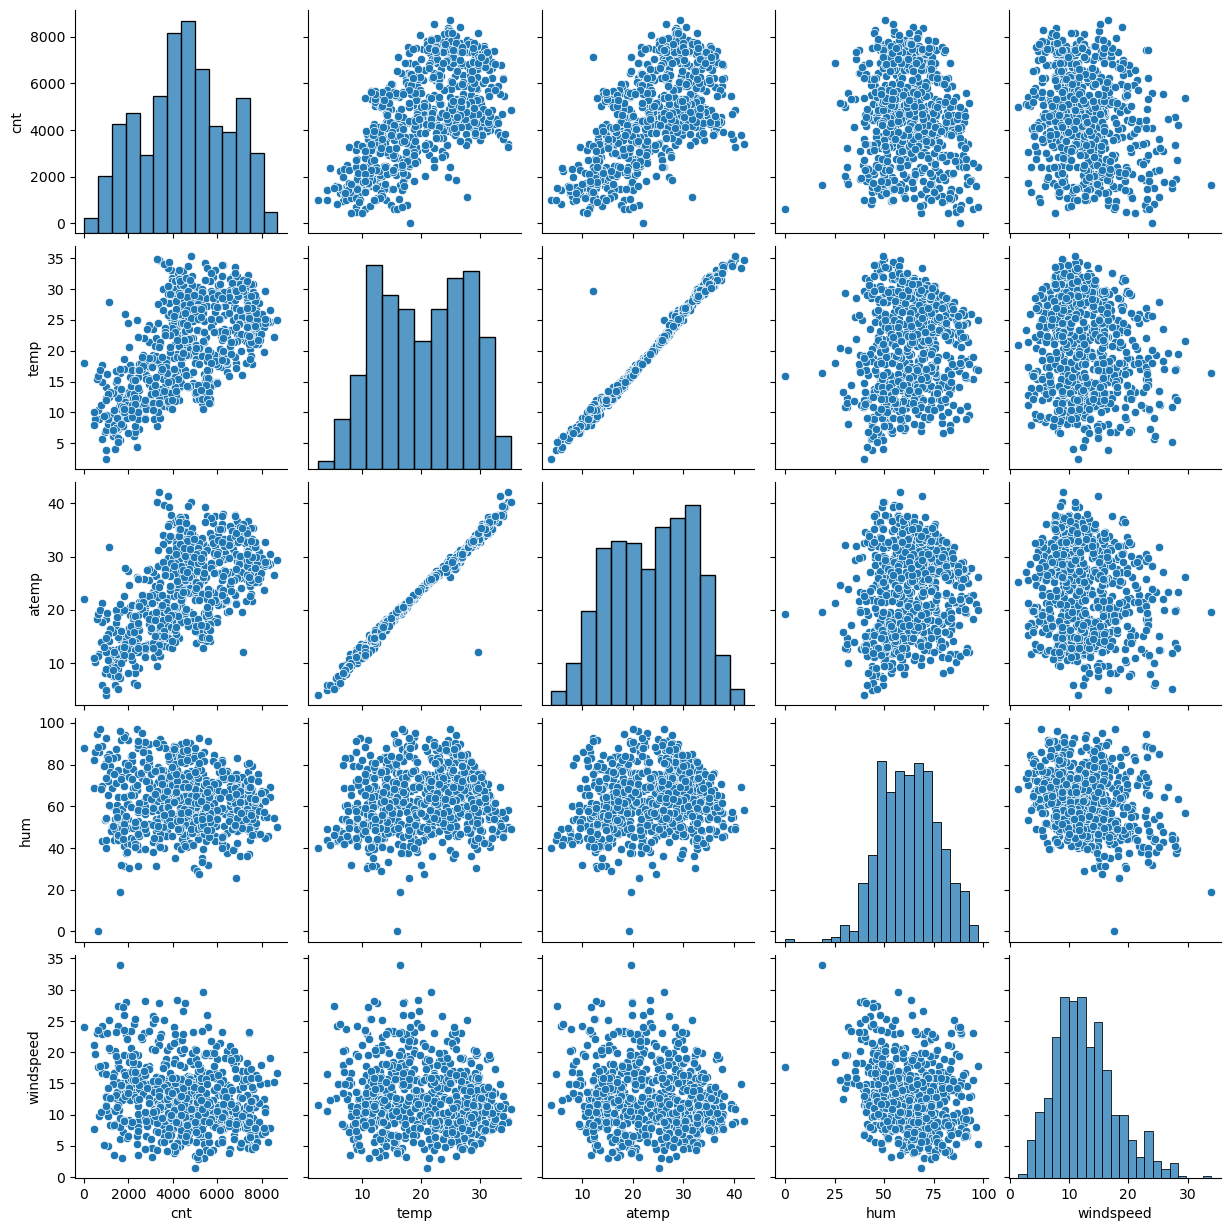

In [2358]:

sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

## Inference
<ul><li>There is a Linear relationship between 'temp','atemp' and 'cnt'</li><li><b>temp</b> and <b>atemp</b> are highly co-related with each other</li></ul>

# 1.3 Visualising 
Categorical Variables<br>
Build a box plot and analyse the categorical variable against the target variable<br>
Target variable is <b>cnt</b>

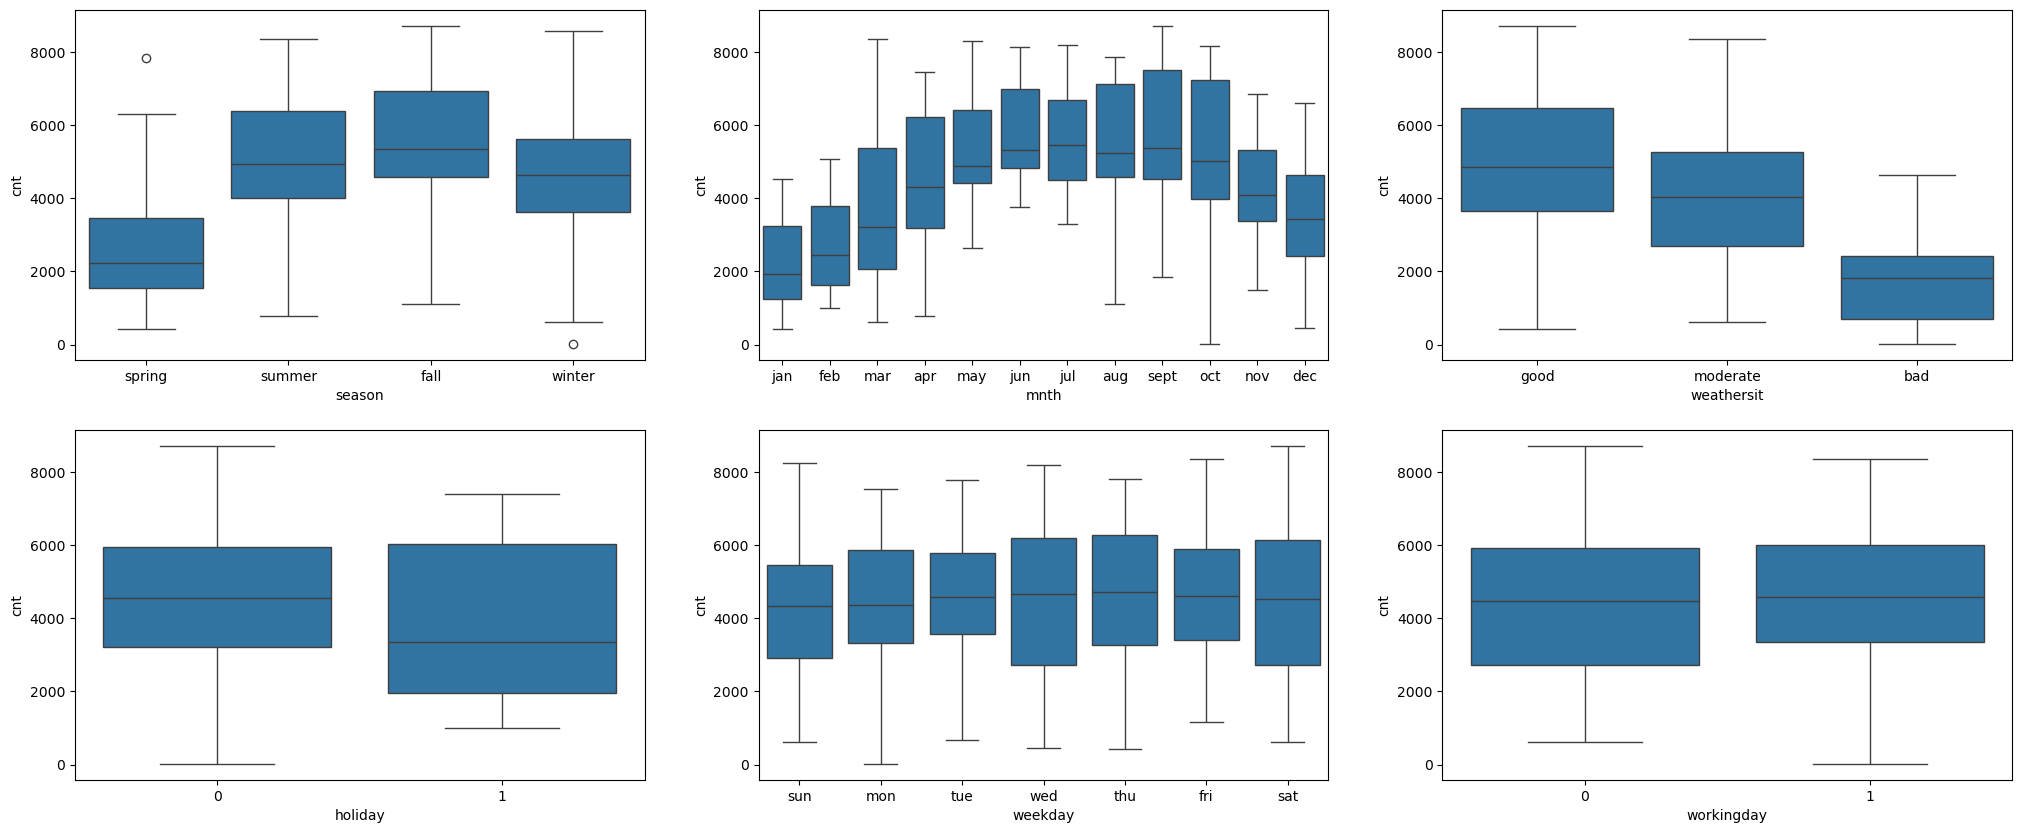

In [2361]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing_df)
plt.show()

## Insights
Based on the box plot,
<ul><li> Maximum booking happens in the <b>season3</b> with the median of 5000</li>
<li>Most of the bookings happen in the <b>month</b> of 5,6,7,8 & 9 with a median of over 4000 booking per month</li>
    <li>Maximum booking in the <b>weather set 1</b> with the median of 5000 </li>
<li>Most of Bike bookings were happening when it is not a holiday. So it is not a good predictor for the dependent variable</li>
    <li><b>weekday</b> almost has the same booking count so this variable can have some or no influence towards the predictor </li>
<li>More Bookings are in the <b>working day</b> with the median of 5000. So it is the good predictor with the dependent variable</li>
</ul>


<h3>Correlations </h3>

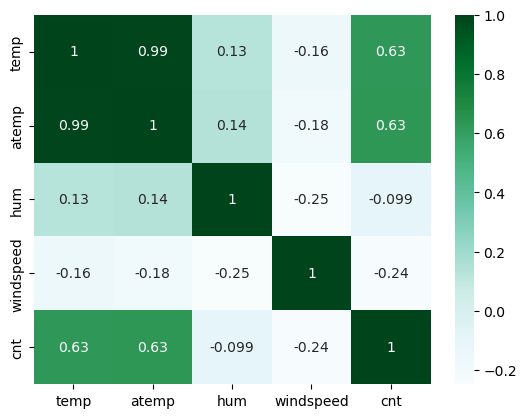

In [2364]:
#Correlations for numeric variables
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [2365]:
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

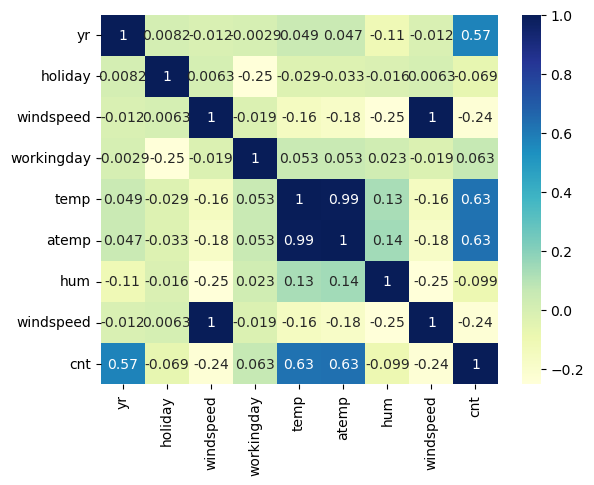

In [2366]:
#Correlations for numeric variables

cor=bikeSharing_df[['yr','holiday','windspeed','workingday','temp','atemp','hum','windspeed','cnt']].corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

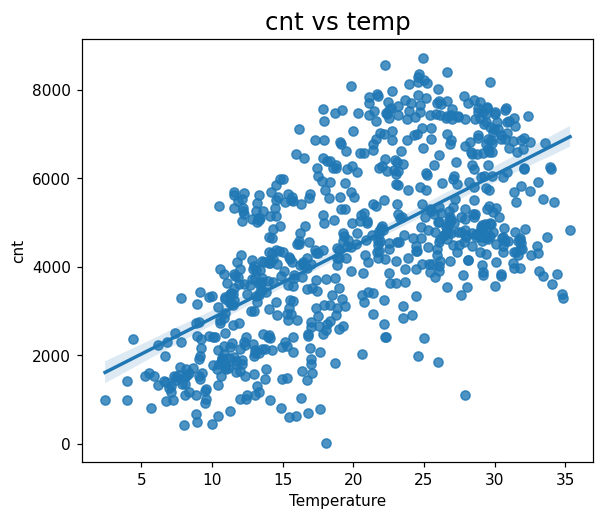

In [2367]:
plt.figure(figsize=(6,5),dpi=110)
plt.title('cnt vs temp',fontsize = 16)
sns.regplot(data = bikeSharing_df,y = 'cnt', x='temp')
plt.xlabel('Temperature')
plt.show()


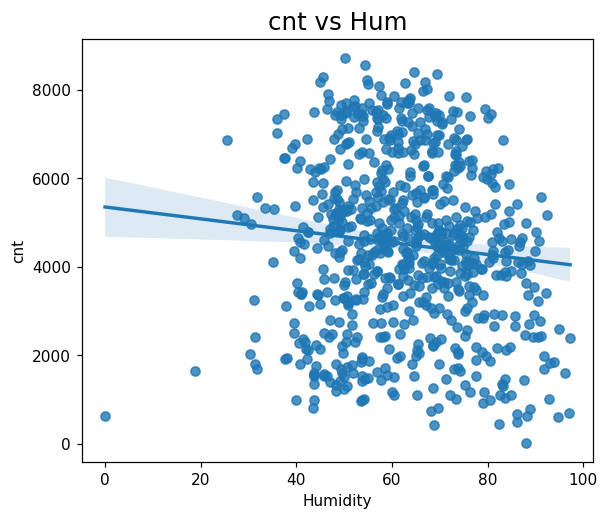

In [2368]:
plt.figure(figsize = (6,5),dpi = 110)
plt.title('cnt vs Hum',fontsize = 16)
sns.regplot(data = bikeSharing_df, y = 'cnt', x ='hum')
plt.xlabel('Humidity')
plt.show()

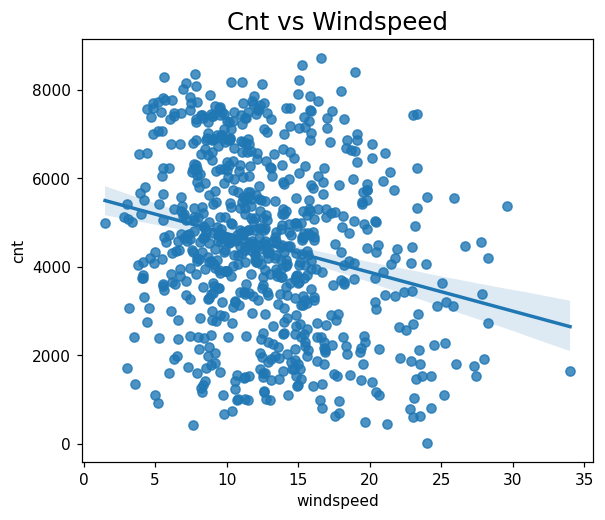

In [2369]:
plt.figure(figsize =(6,5),dpi = 110)
plt.title('Cnt vs Windspeed',fontsize = 16)
sns.regplot(data = bikeSharing_df, y ='cnt', x = 'windspeed')
plt.show()

In [2370]:
# List of categorical columns to create dummies
cat = ['season', 'mnth', 'weekday', 'weathersit']
# Create dummy variables
dummy = pd.get_dummies(bikeSharing_df[cat]).astype(int)
bikeSharing_df = pd.concat([bikeSharing_df, dummy], axis=1)
bikeSharing_df.drop(columns=cat, inplace=True)

<h3>Inference</h3>
<ul><li>Target variable has a linear relationship with some of the independent variables</li></ul>


## 2. Preparing the Data for building the model


In [2373]:

bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_fall', 'season_winter',
       'mnth_jan', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_sun', 'weekday_mon', 'weekday_tue', 'weekday_wed',
       'weekday_thu', 'weekday_fri', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [2374]:

bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_fall', 'season_winter',
       'mnth_jan', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_sun', 'weekday_mon', 'weekday_tue', 'weekday_wed',
       'weekday_thu', 'weekday_fri', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [2375]:
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_good,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,1,0,0


<h3>Splitting data into train and test data</h3>

In [2377]:
bikeSharing_df.shape
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_good,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,1,0,0


In [2378]:
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bikeSharing_df
#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_fall,...,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_good,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [2379]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 33)
(219, 33)


# RESCALING THE FEATURES

In [2381]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2382]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_fall', 'season_winter',
       'mnth_jan', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_sun', 'weekday_mon', 'weekday_tue', 'weekday_wed',
       'weekday_thu', 'weekday_fri', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [2383]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_fall,...,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_good,weathersit_moderate,weathersit_bad
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.260274,...,0.152642,0.148728,0.131115,0.140900,0.146771,0.129159,0.150685,0.624266,0.346380,0.029354
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.439214,...,0.359994,0.356169,0.337857,0.348259,0.354224,0.335704,0.358092,0.484786,0.476282,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2384]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_fall,...,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_good,weathersit_moderate,weathersit_bad
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,0,...,0,0,0,0,1,0,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,0,...,0,1,0,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,1,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,1,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [2385]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_fall', 'season_winter',
       'mnth_jan', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_sun', 'weekday_mon', 'weekday_tue', 'weekday_wed',
       'weekday_thu', 'weekday_fri', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

# BUILDING A LINEAR MODEL

In [2387]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2388]:
# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train,y_train)



LinearRegression()

In [2389]:
model = LinearRegression()
model.fit(X_train, y_train)
            
# Initialize RFE with the linear model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [2390]:

# Get the selected features
selected_features = X_train.columns[rfe.support_]
ranking = rfe.ranking_

# Display the selected features
print("Selected Features:", selected_features)
print("Feature ranking:", ranking)


Selected Features: Index(['holiday', 'workingday', 'season_spring', 'season_summer',
       'season_fall', 'season_winter', 'mnth_jan', 'mnth_apr', 'mnth_nov',
       'mnth_dec', 'weekday_sun', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate', 'weathersit_bad'],
      dtype='object')
Feature ranking: [16  1  1 17 15 18 19  1  1  1  1  1  2  4  1  6  7  8  5  9  3  1  1  1
 12 14 13 11 10  1  1  1  1]


In [2391]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 16),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 17),
 ('atemp', False, 15),
 ('hum', False, 18),
 ('windspeed', False, 19),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_mar', False, 4),
 ('mnth_apr', True, 1),
 ('mnth_may', False, 6),
 ('mnth_jun', False, 7),
 ('mnth_jul', False, 8),
 ('mnth_aug', False, 5),
 ('mnth_sept', False, 9),
 ('mnth_oct', False, 3),
 ('mnth_nov', True, 1),
 ('mnth_dec', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 13),
 ('weekday_thu', False, 11),
 ('weekday_fri', False, 10),
 ('weekday_sat', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

## Common Function to build a model using statsmodel api

In [2393]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def Create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [2394]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def Calculate_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [2395]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['holiday', 'workingday', 'season_spring', 'season_summer',
       'season_fall', 'season_winter', 'mnth_jan', 'mnth_apr', 'mnth_nov',
       'mnth_dec', 'weekday_sun', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [2396]:
# Features not selected by RFE
X_train.columns[~rfe.support_]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   511 non-null    int64  
 1   holiday              511 non-null    int64  
 2   workingday           511 non-null    int64  
 3   temp                 511 non-null    float64
 4   atemp                511 non-null    float64
 5   hum                  511 non-null    float64
 6   windspeed            511 non-null    float64
 7   season_spring        511 non-null    int32  
 8   season_summer        511 non-null    int32  
 9   season_fall          511 non-null    int32  
 10  season_winter        511 non-null    int32  
 11  mnth_jan             511 non-null    int32  
 12  mnth_feb             511 non-null    int32  
 13  mnth_mar             511 non-null    int32  
 14  mnth_apr             511 non-null    int32  
 15  mnth_may             511 non-null    int32 

In [2397]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed','season_spring',
       'season_summer', 'season_winter', 'mnth_may','mnth_jun','mnth_jul', 'mnth_aug', 'mnth_sept','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]
X_train_rfe.shape
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sept,mnth_sept,weekday_sat,weathersit_bad,weathersit_moderate
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,0,0,0,0,0,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,1


In [2398]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 16),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 17),
 ('atemp', False, 15),
 ('hum', False, 18),
 ('windspeed', False, 19),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_mar', False, 4),
 ('mnth_apr', True, 1),
 ('mnth_may', False, 6),
 ('mnth_jun', False, 7),
 ('mnth_jul', False, 8),
 ('mnth_aug', False, 5),
 ('mnth_sept', False, 9),
 ('mnth_oct', False, 3),
 ('mnth_nov', True, 1),
 ('mnth_dec', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 13),
 ('weekday_thu', False, 11),
 ('weekday_fri', False, 10),
 ('weekday_sat', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

## Step 3: Build Model & Train the Model


In [2400]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr','holiday','workingday','temp','hum','windspeed','season_summer','season_winter','mnth_jul','mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']

Create_model(cols)
Calculate_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.37e-181
Time:                        10:36:58   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8367.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1464.4690    

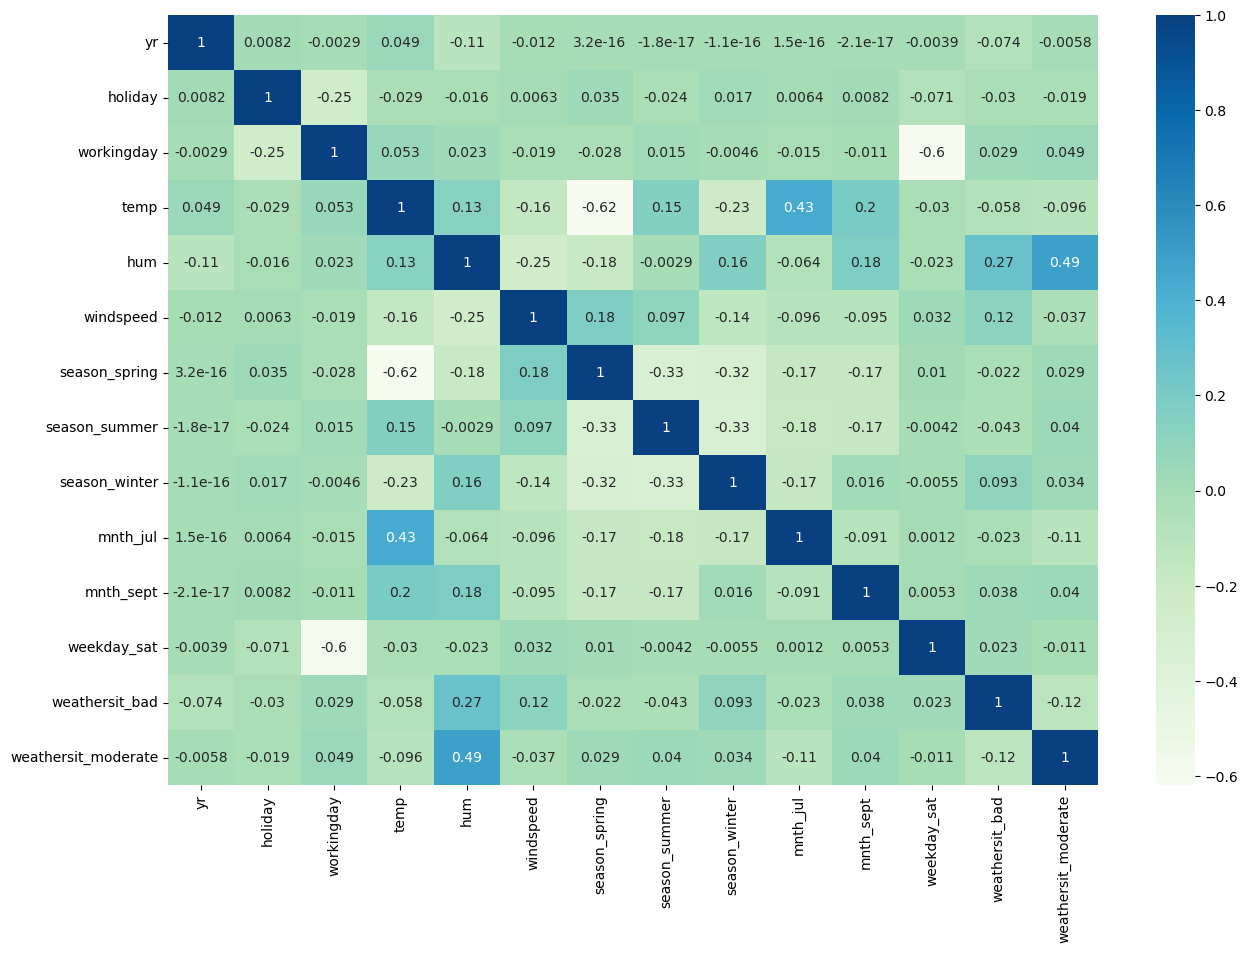

In [2401]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))

sns.heatmap(bikeSharing_df[ ['yr','holiday','workingday','temp','hum','windspeed','season_spring','season_summer','season_winter'
        ,'mnth_jul','mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

# Model 2
<ul><li>Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-valuecols)</li></ul>

In [2403]:
cols = ['yr','holiday','workingday','temp','windspeed','season_summer','season_spring','season_winter'
        ,'mnth_jul','mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']
Create_model(cols)
Calculate_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.46e-181
Time:                        10:36:59   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

# Model 3 
<h3>Dropping the variable holiday & mnth_jun as it has negative coefficient and is insignificant as it has high p-value</h3>


In [2405]:
cols=['yr','workingday','temp','windspeed','season_spring','season_summer','season_winter'
        ,'mnth_jul','mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']
Create_model(cols)
Calculate_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.56e-182
Time:                        10:36:59   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

# Model  4
<h3>Drop temp as it has high VIF</h3>

In [2407]:
cols=['yr','workingday','windspeed','season_spring','season_summer','season_winter'
        ,'mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']
Create_model(cols)
Calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.84e-150
Time:                        10:36:59   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

# Model 5

In [2409]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols=['yr','workingday','windspeed','season_spring','season_summer','season_winter'
        ,'mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']
Create_model(cols)
Calculate_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.84e-150
Time:                        10:36:59   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

# Model 6
<h3>Dropping the value temp as it has little high VIF</h3>

In [2411]:
cols = ['yr','workingday','windspeed','season_spring','season_winter'
        ,'mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']
Create_model(cols)
Calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          7.57e-151
Time:                        10:36:59   Log-Likelihood:                -4223.8
No. Observations:                 511   AIC:                             8468.
Df Residuals:                     501   BIC:                             8510.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4533.4997    

<h3>The Model 6 looks good because there are no features which is >0.05 and all the features VIF is less than 4.5</h3>


# Inference
Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.503
Let us select Mode l1 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model

# Step 4: Residual Analysis of the train data:


In [2474]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [2484]:
cols = ['yr','workingday','windspeed','season_spring','season_winter'
        ,'mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)


4533.499679986317 [ 2052.85716139   495.08788325 -1159.84110836 -2622.2702184
  -405.19447873   759.4028004    423.84585879 -2446.61055452
  -729.55190473]


In [2488]:
y_train_pred = lr.predict(X_train[cols])



In [2489]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

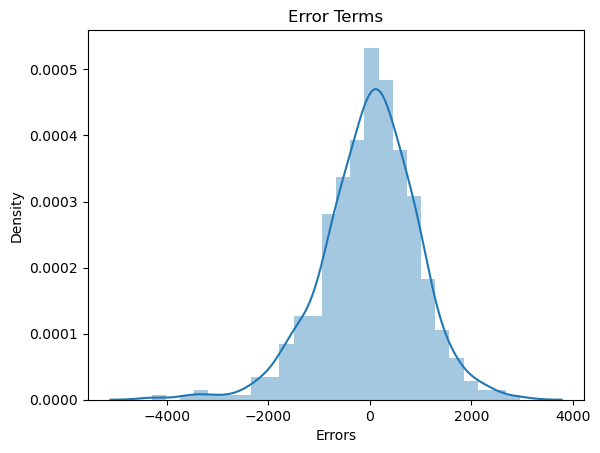

In [2490]:
plot_res_dist(y_train, y_train_pred)


Errors are normally distribured here with mean 0. So everything seems to be fine

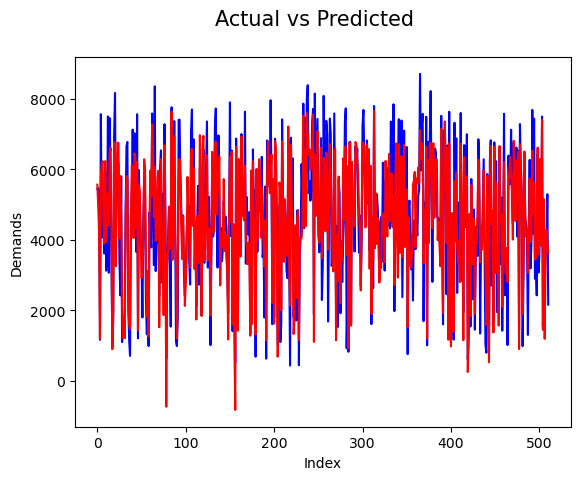

In [2492]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

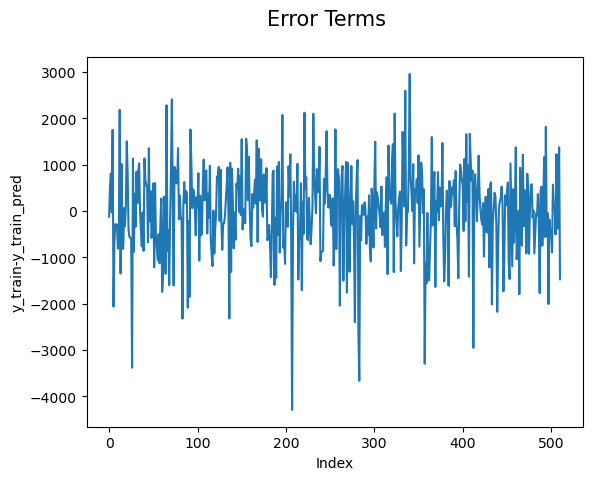

In [2494]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here,If we see the error terms are independent of each other.


In [2496]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.763938289175903

## Inference
R2 Same as we obtained for our final model



# Linearity Check


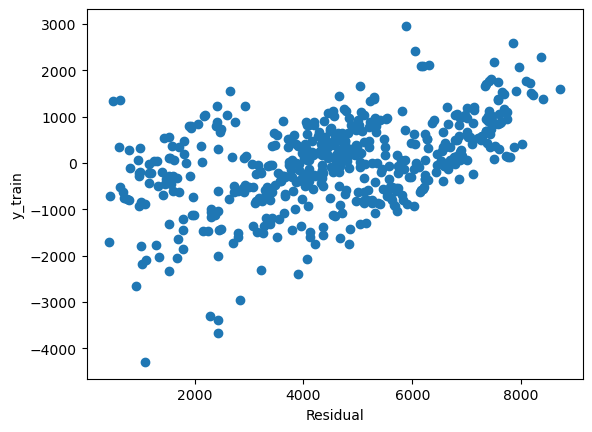

In [2499]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()


# Test Data

In [2501]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [2502]:
#Columns from our final model
cols_test = ['yr','workingday','windspeed','season_spring','season_winter'
        ,'mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols_test])

## R2 Square

In [2504]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
print("r2_train" , round((r2_train*100),2))
print("r2_test" , round((r2_test*100),2))

r2_train 76.39
r2_test 74.2


R2 value for predictions on train data (0.763) is almost same as R2 value of test data(0.678). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

# Adjusted R^2 Score


<h3>n indicates the number of rows in the test data, while n1 indicates the number of rows
in the train data</h3>

In [2508]:
n = X_test.shape[0]
n1 = len(cols_test)

In [2509]:
p = X_test.shape[1]
cols_test_df = pd.DataFrame(cols_test)
# Now you can access the shape
p1 = cols_test_df.shape[1]


<h3>The number of features (predictors) is represented as p for test data and ffi1 for train
data, indicating the number of columns in each </h3>


In [2511]:
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)


In [2512]:
print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 69.59
Train data adjusted r^2 : 73.02


Text(0, 0.5, 'y_testdata_pred')

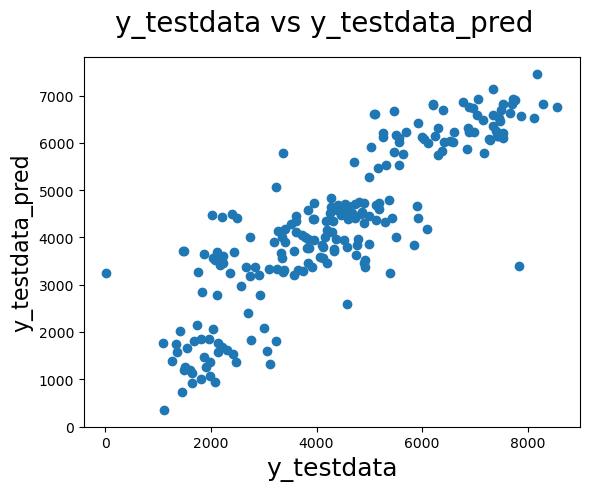

In [2518]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_testdata vs y_testdata_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_testdata', fontsize = 18)                          # X-label
plt.ylabel('y_testdata_pred', fontsize = 16)

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes

## Plot Test vs Predicted test values

In [2522]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="green", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="orange",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

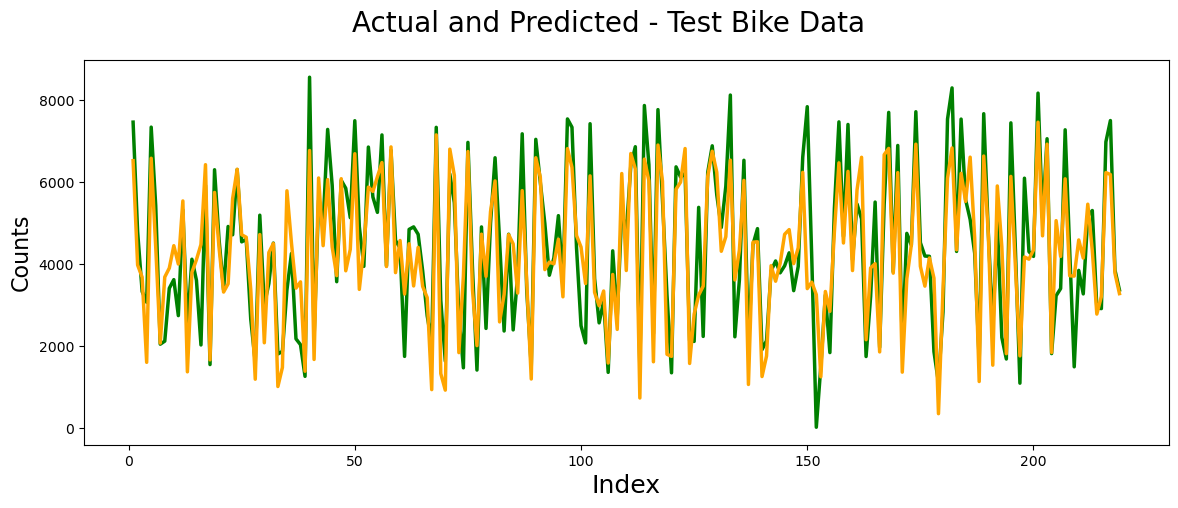

In [2523]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Bike Data')

# Error Terms for the test data

In [2525]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

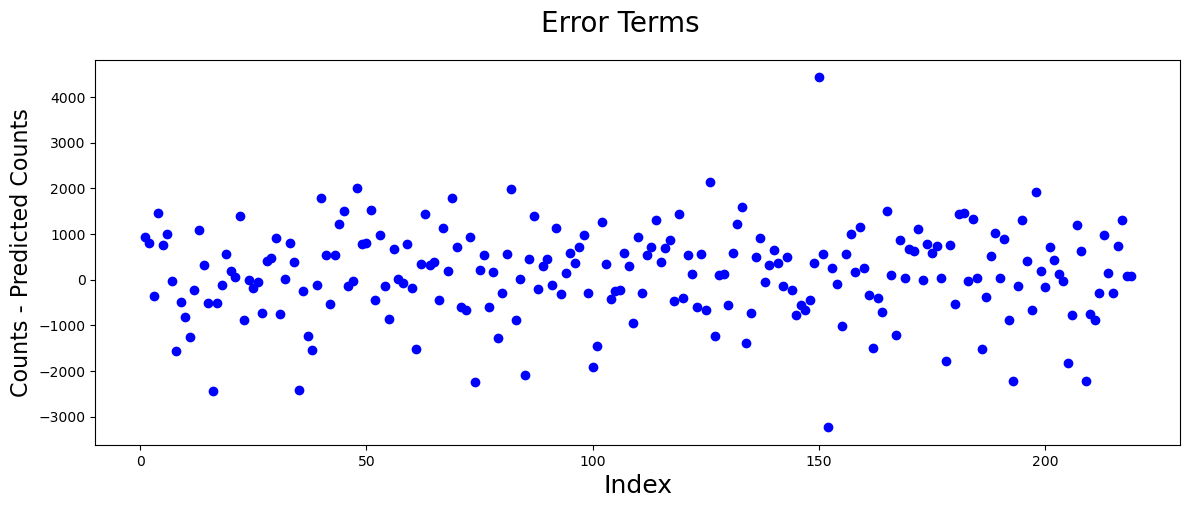

In [2526]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.



# Inference


<b>Columns which are all included in the Model are :</b><br>
Year (yr) - Working day status (workingday) -
Windspeed (windspeed) - Seasonal indicators (season_spring,  season_winter),<br>
Month indicator for September (mnth_sept) - Weekday indicator for Saturday (weekday_sat) -
Weather situation for moderate conditions (weathersit_moderate,weathersit_bad)<br>
**R² Values:**
 <br>Train data  r2 :76.39 
 <br>Test data r2  : 74.2<br>

**Adjusted R² Values:**
<br>Train data adjusted r2 sqr: 73.02 
<br>Test data adjusted r2 sqr: 69.59 <br>
This metrics suggest that the model explains a significant portion of the variance in the training<br>
dataset, with an adjusted R² value of 73.02. However, there is a noticeable drop in performance when
applied to the test data, as evidenced by the adjusted R² of 69.59. 